# Mind or Machine

## Problem statement

### Libraries and Packages

In [14]:
#importing libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib

### Importing Dataset

In [15]:
#Loading dataset from the huggingface
from datasets import load_dataset
ds = load_dataset("dmitva/human_ai_generated_text")
data = ds['train']
print(data[0])

{'id': 'cc902a20-27c4-4c18-8012-048a328206d1', 'human_text': "Also they feel more comfortable at home. Some school have decreased bullying and high and middle school because some students get bullied. Some Schools offter distance learning as an option for students to attend classes from home by way of online or video conferencing. Students can ncreased to learn at home. Also is more hard to students understand by online. students get distract at home. Some schools in United States ofter classes from home because is good option to students . Also students can stay more relaxing from home. Students don't want to go more at school and they want to get classes at home. Students get fall in environment learning. But students can get relaxing at home.\n\nStudents can get distract at home because they have easy to use phones. If students sleep in class they want to sleep at home too. They feel more bored at home because they need stay at home more time. Also students don't do anything at home

#### Labelling dataframe

In [16]:
# Step 4: Create labeled DataFrame
human_df = pd.DataFrame({'text': data['human_text'], 'label': 0})
ai_df = pd.DataFrame({'text': data['ai_text'], 'label': 1})
df = pd.concat([human_df, ai_df], ignore_index=True)

In [17]:
print(df['label'].value_counts())

label
0    1000000
1    1000000
Name: count, dtype: int64


In [18]:
df[df['label'] == 0].tail()

,text,label
999995,You can meet up with your family at the park. ...,0
999996,Even small chores prepare us for something big...,0
999997,"Sometimes people say, ""technology is bad becau...",0
999998,if we had enough time it would had really help...,0
999999,The British naturalist and politician John Lub...,0


In [19]:
df.shape

(2000000, 2)

### Cleaning Dataset

In [20]:
# Step 5: Clean text
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9.,!?\'\" ]', '', text)
    return text.strip()

df['cleaned_text'] = df['text'].apply(clean_text)

In [21]:
print(df[df['label'] == 0]['cleaned_text'].sample(3).values)  # Human
print(df[df['label'] == 1]['cleaned_text'].sample(3).values)  # AI

["Students would benefit attending school from home in many ways.... Falling asleep in class effects on class grades because student pay less attention. Sometimes students are more focused on who finishes first and sometimes think it's a race. Online school could also be better for students sleep schedule, like that students could be more rested and would be able to focus on their work. Better sleeping schedule would help kids focus more on their work and would be able to stay up, whens students dont sleep well the tend for fall asleep in class. Having to wake up early and get ready on time is hard work,making it on time to school is a big task. Just having online classes from home would be better for everyone in general, would honestly make students life much more easier. students would be able to work in a quiet environment with no distractions from other students. Online school should just be a thing for students because its less stressful and much easier.. Another reason why it wou

### Testing and Training

In [22]:
# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

In [23]:
# Step 7: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [24]:
# Step 8: Train model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Evaluation and Visualization

In [25]:
# Step 9: Evaluate
y_pred = model.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Human", "AI"]))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       Human       1.00      1.00      1.00    199814
          AI       1.00      1.00      1.00    200186

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



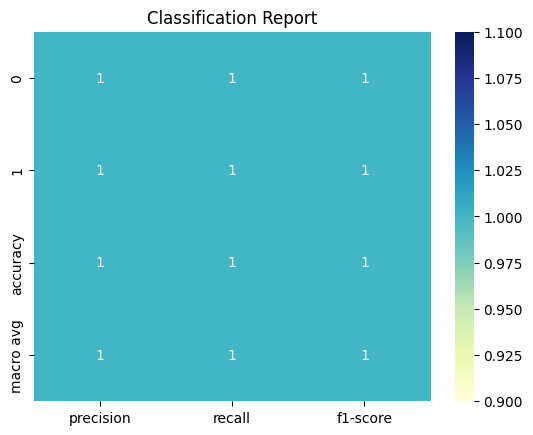

In [35]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report")
plt.show()

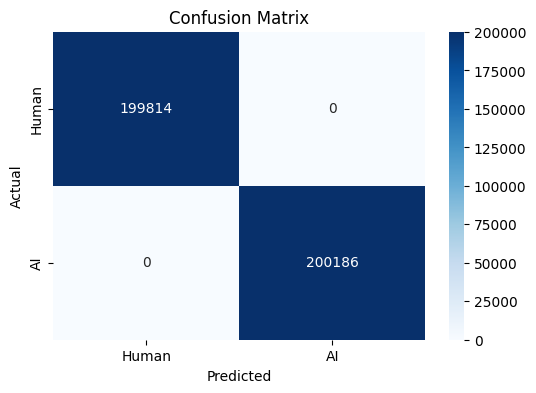

In [26]:
# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

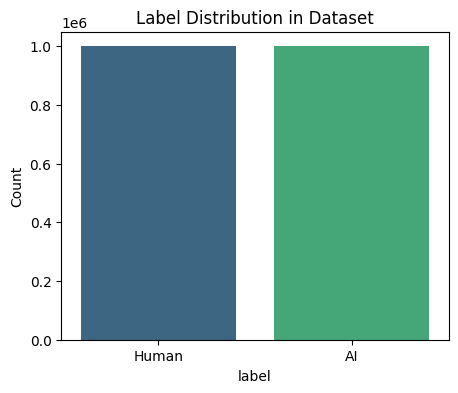

In [27]:
# Step 11: Label Distribution Plot
label_counts = df['label'].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, legend=False, palette='viridis')
plt.xticks([0, 1], ['Human', 'AI'])
plt.ylabel("Count")
plt.title("Label Distribution in Dataset")
plt.show()


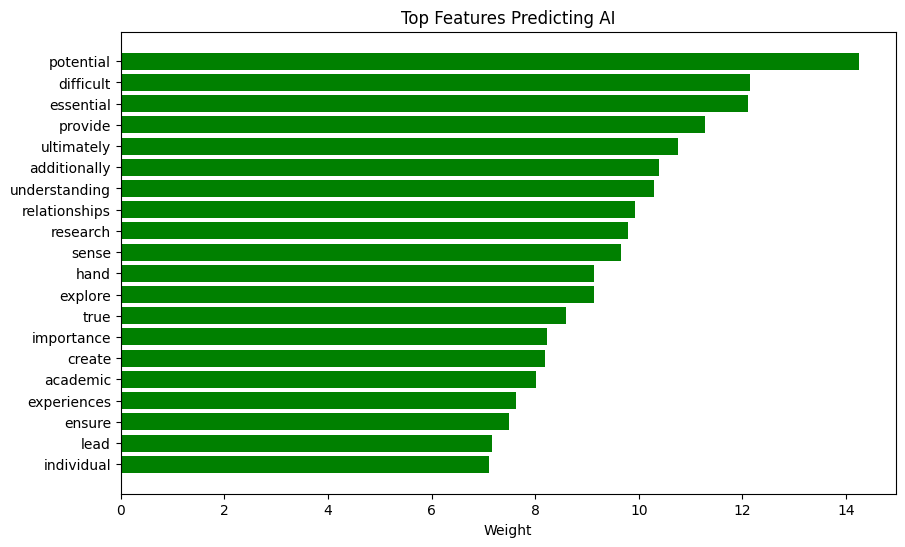

In [28]:
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
top_n = 20

top_positive = np.argsort(coefficients)[-top_n:]
top_negative = np.argsort(coefficients)[:top_n]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), coefficients[top_positive], color='green')
plt.yticks(range(top_n), feature_names[top_positive])
plt.title("Top Features Predicting AI")
plt.xlabel("Weight")
plt.show()

### Saving Model

In [31]:
# Step 12: Save model & vectorizer
joblib.dump(model, "ai_human_classifier_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


### User Testing

In [33]:
# User input
print("\n Try testing your own sentence below!")
user_input = input("Enter a paragraph or sentence: ")

#cleaning user input before class

# Preprocess and predict
cleaned = clean_text(user_input)
vec_input = vectorizer.transform([cleaned])
prediction = model.predict(vec_input)[0]

# Output result
print("\n Result:")
print("This text is likely:", "AI-Generated" if prediction == 1 else "Human-Written")


 Try testing your own sentence below!


Enter a paragraph or sentence:  k s



 Result:
This text is likely: AI-Generated
